<a href="https://colab.research.google.com/github/aflaily/porkes/blob/main/Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting

## import dulu libraries

In [ ]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.metrics import mean_squared_error
from numpy import array
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import pearsonr
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from xgboost import XGBClassifier

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error
from numpy import array
from scipy.stats import kurtosis, skew

## buat fungsi untuk merubah timeseries data menjadi input X dan output y, sliding window

In [ ]:
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[out_end_ix - 1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
def stats_features(input_data):
    inp = list()
    for i in range(len(input_data)):
        inp2=list()
        inp2=input_data[i]
        min=float(np.min(inp2))
        max=float(np.max(inp2))
        diff=(max-min)
        std=float(np.std(inp2))
        mean=float(np.mean(inp2))
        median=float(np.median(inp2))
        kurt=float(kurtosis(inp2))
        sk=float(skew(inp2))
        inp2=np.append(inp2,min)
        inp2=np.append(inp2,max)
        inp2=np.append(inp2,diff)
        inp2=np.append(inp2,std)
        inp2=np.append(inp2,mean)
        inp2=np.append(inp2,median)
        inp2=np.append(inp2,kurt)
        inp2=np.append(inp2,sk)
        #print(list(inp2))
        inp=np.append(inp,inp2)
    inp=inp.reshape(len(input_data),-1)
    #print(inp)
    return inp

## model untuk neural network

In [ ]:
def mlp (X_train, X_test, y_train, y_test):
    #mlp = multilayer perceptron / neural network for regression.
    #to setup parameter, please refer to = https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
    mlp_model = MLPRegressor(random_state=42)
    #mlp_model = MLPRegressor(hidden_layer_sizes=(100,100, ), max_iter=1000, random_state=42)
    #the model learning from training data
    mlp_model.fit(X_train, y_train)
    #get the prediction output
    y_pred = mlp_model.predict(X_test)
    y_pred = np.round(y_pred, 0)

    #get the root mean square error between prediction and real test data
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    #get the pearson correlation
    corr, p_value = pearsonr(y_test, y_pred)
    #returning the output of RMSE, corr, and prediction result
    return rmse, corr, y_pred

## model untuk KNN







In [ ]:
def knn (X_train, X_test, y_train, y_test):
    #k nearest neighbor for regression.
    #to setup the parameter please refer to : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
    knn_model = KNeighborsRegressor()
    #the model is learning from training data
    knn_model.fit(X_train,  y_train)
    #get the prediction output
    y_pred = knn_model.predict(X_test)
    y_pred = np.round(y_pred, 0)
    #get the root mean square error between prediction and real test data
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    #get the pearson correlation
    corr, p_value = pearsonr(y_test, y_pred)
    #returning the output of RMSE, corr, and prediction result
    return rmse, corr, y_pred

## model untuk decision tree

In [ ]:
def dt (X_train, X_test, y_train, y_test):
    model= DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred, 0)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    #get the pearson correlation
    corr, p_value = pearsonr(y_test, y_pred)
    #returning the output of RMSE, corr, and prediction result
    return rmse, corr, y_pred

## model untuk SVR

In [ ]:
def svm (X_train, X_test, y_train, y_test):
    model=SVR()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred, 0)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    #get the pearson correlation
    corr, p_value = pearsonr(y_test, y_pred)
    #returning the output of RMSE, corr, and prediction result
    return rmse, corr, y_pred

## model random forest

In [ ]:
def rf (X_train, X_test, y_train, y_test):
    model=RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred, 0)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    #get the pearson correlation
    corr, p_value = pearsonr(y_test, y_pred)
    #returning the output of RMSE, corr, and prediction result
    return rmse, corr, y_pred

## read dataset

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/bikesharing_day.csv', delimiter=',')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_ori = df
df_ori['date'] = pd.to_datetime(df_ori['dteday'])

df_ori['cnt'].iloc[:10]

0     985
1     801
2    1349
3    1562
4    1600
5    1606
6    1510
7     959
8     822
9    1321
Name: cnt, dtype: int64

In [ ]:
df_X = df_ori[['cnt','cnt']]
in_seq = df_X.astype(float).values
#out_seq = df_y.astype(float).values

#in_seq1 = in_seq.reshape(in_seq.shape[0], in_seq.shape[1])
#out_seq = out_seq.reshape((len(out_seq), 1))

#from numpy import hstack
#dataset = hstack((in_seq1, out_seq))


n_steps_in, n_steps_out = 7, 1
X, y = split_sequences(in_seq, n_steps_in, n_steps_out)

n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = False)
X_train = stats_features(X_train)
X_test = stats_features(X_test)


In [ ]:
X.shape

(724, 7)

In [ ]:
X

array([[ 985.,  801., 1349., ..., 1600., 1606., 1510.],
       [ 801., 1349., 1562., ..., 1606., 1510.,  959.],
       [1349., 1562., 1600., ..., 1510.,  959.,  822.],
       ...,
       [1749., 1787.,  920., ...,  441., 2114., 3095.],
       [1787.,  920., 1013., ..., 2114., 3095., 1341.],
       [ 920., 1013.,  441., ..., 3095., 1341., 1796.]])

In [ ]:
X[0]

array([ 985.,  801., 1349., 1562., 1600., 1606., 1510.])

In [ ]:
y[0]

959.0

In [ ]:
df_new=df_ori[['date','cnt']]
df_new.set_index('date')

,cnt
date,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341


## EDA, exploratory data analysis

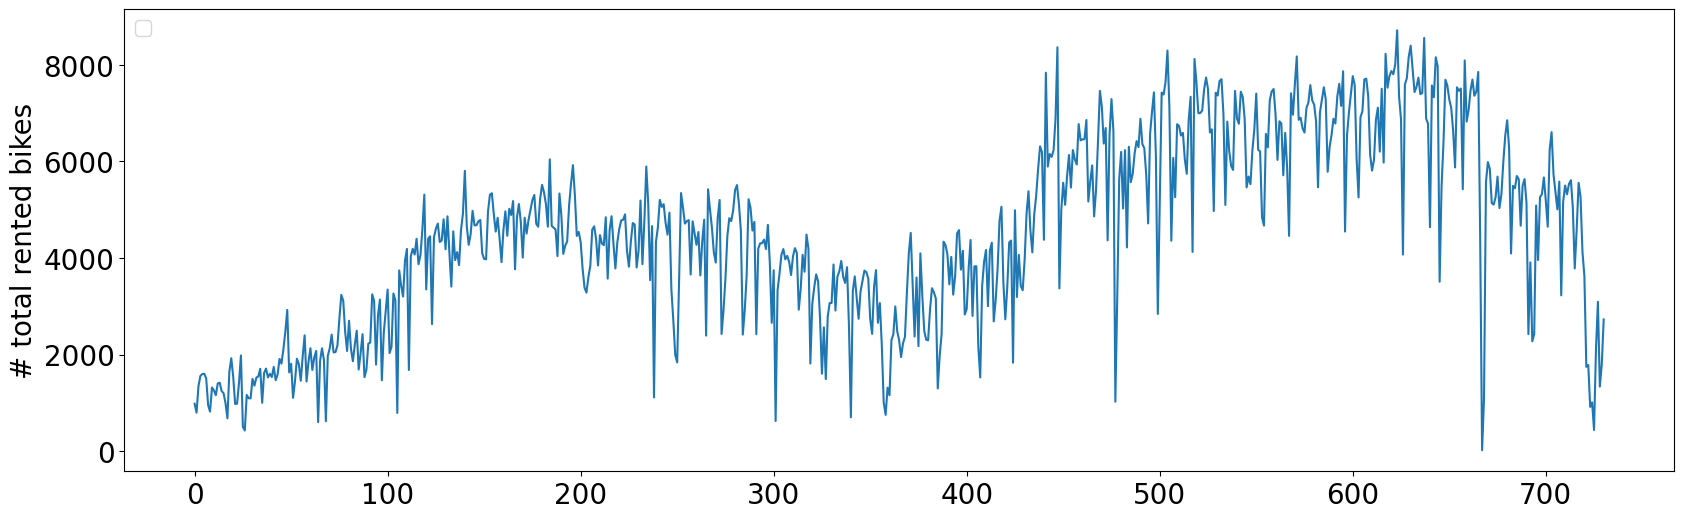

In [ ]:
fig1 = plt.figure(figsize=(20,6))
plt.plot(df_new['cnt'])
#plt.xlabel('Time t',  fontsize=20)
#because we use temperature data, so that the y axis is temperature
plt.ylabel('# total rented bikes',  fontsize=20)
plt.legend(loc='upper left',  fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## cek input X dan output y

In [ ]:
X_test

array([[ 7.26100000e+03,  7.17500000e+03,  6.82400000e+03, ...,
         7.17500000e+03,  1.26035954e+00, -1.61014201e+00],
       [ 7.17500000e+03,  6.82400000e+03,  5.46400000e+03, ...,
         7.17500000e+03,  1.24918864e+00, -1.60788578e+00],
       [ 6.82400000e+03,  5.46400000e+03,  7.01300000e+03, ...,
         7.01300000e+03, -1.06897210e+00, -7.44093013e-01],
       ...,
       [ 1.74900000e+03,  1.78700000e+03,  9.20000000e+02, ...,
         1.74900000e+03, -7.00875354e-01,  4.08689098e-01],
       [ 1.78700000e+03,  9.20000000e+02,  1.01300000e+03, ...,
         1.34100000e+03, -5.66707479e-01,  6.15554041e-01],
       [ 9.20000000e+02,  1.01300000e+03,  4.41000000e+02, ...,
         1.34100000e+03, -5.75176655e-01,  6.10415999e-01]])

In [ ]:
y_test

array([7286., 5786., 6299., 6544., 6883., 6784., 7347., 7605., 7148.,
       7865., 4549., 6530., 7006., 7375., 7765., 7582., 6053., 5255.,
       6917., 7040., 7697., 7713., 7350., 6140., 5810., 6034., 6864.,
       7112., 6203., 7504., 5976., 8227., 7525., 7767., 7870., 7804.,
       8009., 8714., 7333., 6869., 4073., 7591., 7720., 8167., 8395.,
       7907., 7436., 7538., 7733., 7393., 7415., 8555., 6889., 6778.,
       4639., 7572., 7328., 8156., 7965., 3510., 5478., 6392., 7691.,
       7570., 7282., 7109., 6639., 5875., 7534., 7461., 7509., 5424.,
       8090., 6824., 7058., 7466., 7693., 7359., 7444., 7852., 4459.,
         22., 1096., 5566., 5986., 5847., 5138., 5107., 5259., 5686.,
       5035., 5315., 5992., 6536., 6852., 6269., 4094., 5495., 5445.,
       5698., 5629., 4669., 5499., 5634., 5146., 2425., 3910., 2277.,
       2424., 5087., 3959., 5260., 5323., 5668., 5191., 4649., 6234.,
       6606., 5729., 5375., 5008., 5582., 3228., 5170., 5501., 5319.,
       5532., 5611.,

## panggil fungsi Machine learning model

In [ ]:
#calling the function mlp.
#returning rmse, pearson correlation, and prediction output
rmse_mlp, corr_mlp, y_pred_mlp = mlp(X_train, X_test, y_train, y_test)
#calling the function knn
#returning rmse, pearson correlation, and prediction output
rmse_knn, corr_knn, y_pred_knn = knn(X_train, X_test, y_train, y_test)
rmse_dt, corr_dt, y_pred_dt = dt(X_train, X_test, y_train, y_test)
#rmse_svm, corr_svm, y_pred_svm = svm(X_train, X_test, y_train, y_test)
rmse_rf, corr_rf, y_pred_rf = rf(X_train, X_test, y_train, y_test)


## visualisasi

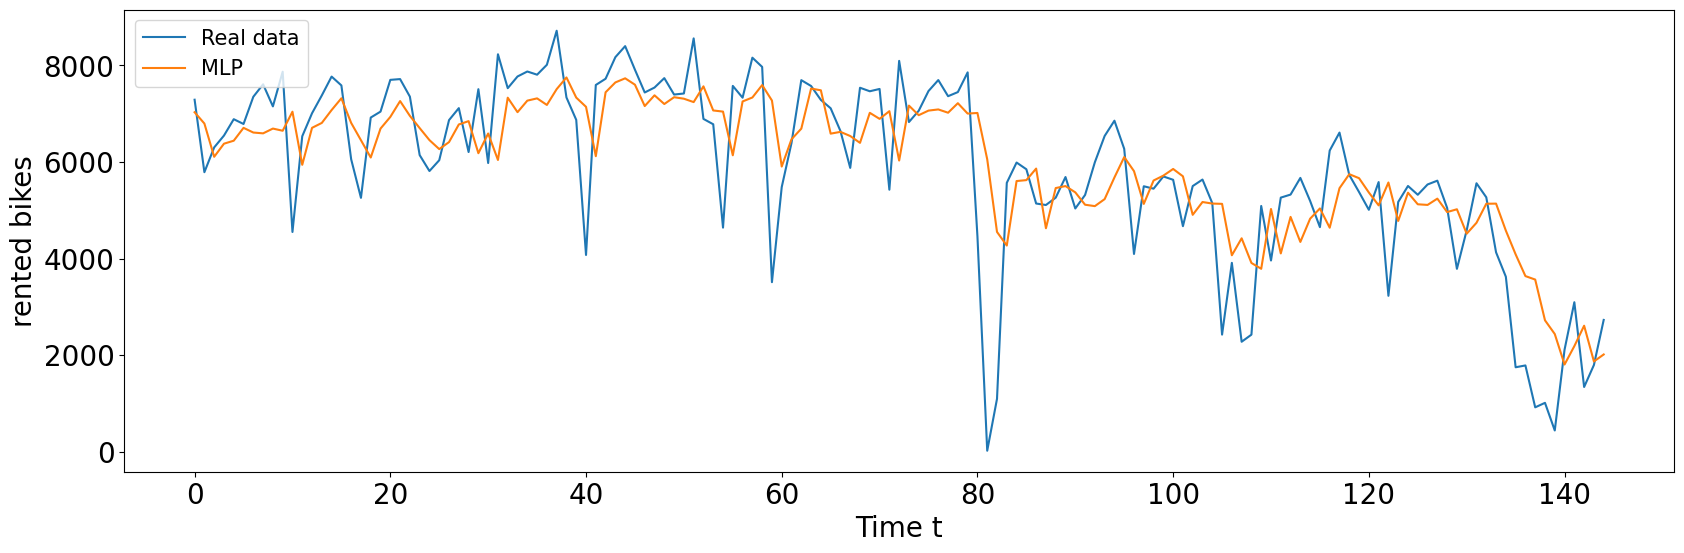

In [ ]:
fig1 = plt.figure(figsize=(20,6))
#plotting the result
# because the total number of test is data is high, so we just print the first 100 data
# y_test[0:100] get the first 100 data from y_test or real test data.
# y_pred_mlp is the prediction result from MLP
# y_pred_knn is the prediction result from KNN
plt.plot(y_test, label='Real data')

#plt.plot(y_pred_knn, label='KNN')
#plt.plot(y_pred_dt, label='DT')
#plt.plot(y_pred_rf, label='RF')

plt.plot(y_pred_mlp, label='MLP')
#title
#pyplot.title('First 100 Test Data')
#the x axis is timestamp, with interval 1 day
plt.xlabel('Time t',  fontsize=20)
#because we use total rented bikes, so that the y axis is rented bikes
plt.ylabel('rented bikes',  fontsize=20)
plt.legend(loc='upper left',  fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()




In [ ]:
#print out the RMSE , pearson correlation coefficient for MLP and KNN
# low RMSE is better
# high pearson correlation coefficient is better.
print('________________________')
print('MLP')
print('RMSE : %.3f' %rmse_mlp)
print('Pearson correlation coefficient: %.3f' %corr_mlp)

print('________________________')
print('KNN')
print('RMSE : %.3f' %rmse_knn)
print('Pearson correlation coefficient: %.3f' %corr_knn)

print('________________________')
print('DT')
print('RMSE : %.3f' %rmse_dt)
print('Pearson correlation coefficient: %.3f' %corr_dt)



print('________________________')
print('RF')
print('RMSE : %.3f' %rmse_rf)
print('Pearson correlation coefficient: %.3f' %corr_rf)



________________________
MLP
RMSE : 1190.549
Pearson correlation coefficient: 0.778
________________________
KNN
RMSE : 1357.710
Pearson correlation coefficient: 0.696
________________________
DT
RMSE : 1854.465
Pearson correlation coefficient: 0.484
________________________
RF
RMSE : 1324.452
Pearson correlation coefficient: 0.716
